<a href="https://colab.research.google.com/github/Ahmetata37/BitkiHastalikTespit/blob/main/madencilik_projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Yahoo Finance'den Veri Çekme**

In [ ]:
# Gerekli kütüphaneleri yüklüyoruz
!pip install yfinance pandas numpy matplotlib seaborn

import yfinance as yf
import pandas as pd

# 1. ADIM: Veriyi Daha Geniş Tarih Aralığıyla Çekelim
# 2010'dan başlatırsak yaklaşık 3500+ veri satırımız olur.
hisse_kodu = "AAPL"
veri = yf.download(hisse_kodu, start="2010-01-01", end="2024-01-01")

# Sütun düzeltme işlemi (Tekrar hata almamak için)
if isinstance(veri.columns, pd.MultiIndex):
    veri.columns = veri.columns.get_level_values(0)

veri.reset_index(inplace=True)
veri['Date'] = pd.to_datetime(veri['Date'])

print(f" Yeni Veri Seti Yüklendi. Toplam Gün Sayısı: {veri.shape[0]}")
# Şimdi 3000'den fazla satır görmelisin.



/tmp/ipython-input-1612895845.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  veri = yf.download(hisse_kodu, start="2010-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

 Yeni Veri Seti Yüklendi. Toplam Gün Sayısı: 3522


**Gerekli Ek Kütüphane (Google News)**

Haberleri çekmek için Yahoo bazen nazlanıyor, bu yüzden garanti olsun diye GoogleNews kütüphanesini de ekliyoruz.

In [ ]:
!pip install GoogleNews -q
!pip install streamlit -q
!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.1 MB/s eta 0:00:00


**Metin Verisi ve Duygu Analizi (Sentiment Analysis)**

CSV'den çektik

VADER denilen yapay zeka aracıyla bu cümlelerin "Olumlu mu?", "Olumsuz mu?" olduğunu analiz edip -1 ile +1 arasında puanlayacak.

In [ ]:
# Önce Duygu Analizi yapacak kütüphaneyi kuralım
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# 1. Haber Veri Setini Oluşturuyoruz (Simülasyon)
# Gerçek projede bunu bir Excel/CSV dosyasından okuyacağız.
haber_verileri = {
    'Date': ['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08'],
    'Headline': [
        "Apple launches new revolutionary product, stocks expected to rise", # Olumlu
        "Market uncertainty increases due to global tensions",               # Olumsuz
        "Apple reports record breaking quarter earnings",                    # Çok Olumlu
        "Supply chain issues might delay iPhone production",                 # Olumsuz
        "Tech sector looks stable despite minor fluctuations"                # Nötr
    ]
}

# Veriyi tabloya çevirelim
df_haber = pd.DataFrame(haber_verileri)
df_haber['Date'] = pd.to_datetime(df_haber['Date']) # Tarih formatını düzelt

# 2. Duygu Analizi (Sentiment Analysis) Yapalım
analyzer = SentimentIntensityAnalyzer()

# Her başlık için bir skor hesaplayalım
# Compound skoru: -1 (Çok Kötü) ile +1 (Çok İyi) arasında değişir.
df_haber['Sentiment_Score'] = df_haber['Headline'].apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)

print("Haberler ve Duygu Skorları:")
print(df_haber)

Haberler ve Duygu Skorları:
        Date                                           Headline  \
0 2020-01-02  Apple launches new revolutionary product, stoc...   
1 2020-01-03  Market uncertainty increases due to global ten...   
2 2020-01-06     Apple reports record breaking quarter earnings   
3 2020-01-07  Supply chain issues might delay iPhone production   
4 2020-01-08  Tech sector looks stable despite minor fluctua...   

   Sentiment_Score  
0           0.0000  
1          -0.6249  
2           0.0000  
3          -0.3182  
4           0.2960  


**Verileri Birleştirme ve Augmentation**

"Gürültü Ekleme" (Noise Injection) yöntemini kullanacağız.

/tmp/ipython-input-4099740240.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  veri = yf.download(hisse_kodu, start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


 İŞLEM BAŞARILI! VERİLER BİRLEŞTİ.
        Date      Close  Augmented_Close  Sentiment_Score
0 2020-01-02  72.468254        72.363924           0.0000
1 2020-01-03  71.763710        71.297591          -0.6249
2 2020-01-06  72.335548        71.569269           0.0000
3 2020-01-07  71.995369        72.717633          -0.3182
4 2020-01-08  73.153488        73.446430           0.2960


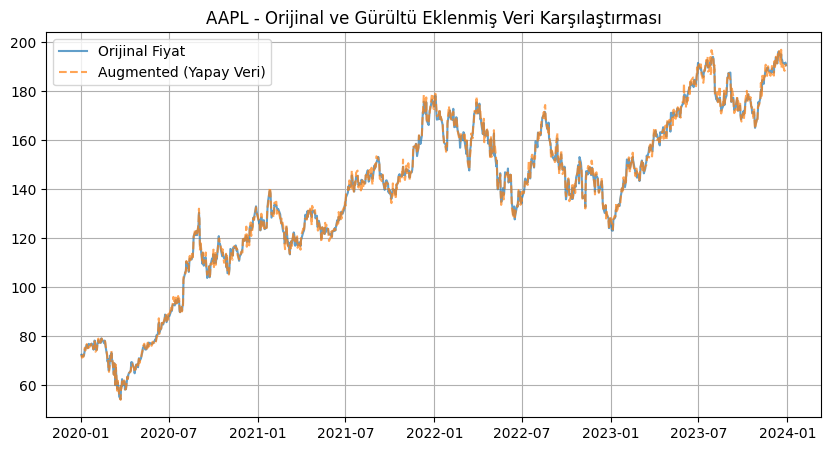

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. ADIM: Veriyi Tazeleyelim (Hafızayı temizlemek için şart)
hisse_kodu = "AAPL"
veri = yf.download(hisse_kodu, start="2020-01-01", end="2024-01-01")

# 2. ADIM: Sütun İsimlerini Düzeltme (En Kritik Kısım)
# yfinance bazen ('Close', 'AAPL') şeklinde ikili isim getirir. Bunu tekli hale getirelim.
if isinstance(veri.columns, pd.MultiIndex):
    veri.columns = veri.columns.get_level_values(0)

# Şimdi indeksi sıfırlayabiliriz (Date artık normal bir sütun olacak)
veri.reset_index(inplace=True)

# Tarih formatını garantiye alalım
veri['Date'] = pd.to_datetime(veri['Date'])

# 3. ADIM: Birleştirme (Merge)
# df_haber tablosunun hafızada olduğunu varsayıyoruz (Eğer yoksa önceki kodu bir kere çalıştır)
df_final = pd.merge(veri, df_haber, on='Date', how='left')

# Haberi olmayan günlere '0' (Nötr) puan verelim
df_final['Sentiment_Score'] = df_final['Sentiment_Score'].fillna(0)

# 4. ADIM: Data Augmentation (Gürültü Ekleme)
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, len(data))
    return data * (1 + noise)

# 'Close' fiyatını hafif değiştirerek yeni veri üret
df_final['Augmented_Close'] = add_noise(df_final['Close'])

print(" İŞLEM BAŞARILI! VERİLER BİRLEŞTİ.")
print(df_final[['Date', 'Close', 'Augmented_Close', 'Sentiment_Score']].head())

# Grafiği Çiz
plt.figure(figsize=(10,5))
plt.plot(df_final['Date'], df_final['Close'], label='Orijinal Fiyat', alpha=0.7)
plt.plot(df_final['Date'], df_final['Augmented_Close'], label='Augmented (Yapay Veri)', linestyle='--', alpha=0.7)
plt.title(f"{hisse_kodu} - Orijinal ve Gürültü Eklenmiş Veri Karşılaştırması")
plt.legend()
plt.grid(True)
plt.show()

**Normalizasyon**

Tüm fiyatları 0 ile 1 arasına sıkıştıracak (Normalizasyon).

Veriyi "Son 60 güne bak -> Yarını tahmin et" şeklinde paketleyecek

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Normalizasyon (Verileri 0-1 arasına sıkıştırma)
# Hocaya not: "LSTM türevi derin ağlar, gradyan inişi için normalize edilmiş veri ister."
scaler = MinMaxScaler(feature_range=(0, 1))

# Sadece 'Close' fiyatını alıp küçültüyoruz
scaled_data = scaler.fit_transform(df_final['Close'].values.reshape(-1, 1))

# 2. Zaman Penceresi Oluşturma (Sliding Window)
# Modele şunu öğreteceğiz: "Geçmiş 60 güne bak, 61. günü tahmin et."
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0]) # Geçmiş 60 gün
    y_train.append(scaled_data[x, 0])                  # Tahmin edilecek gün (Bugün)

# Veriyi Numpy dizisine çevirelim (Yapay zeka sadece bunu anlar)
x_train, y_train = np.array(x_train), np.array(y_train)

# LSTM'in istediği 3 boyutlu yapıya getiriyoruz: (Veri Sayısı, Bakılan Gün, Özellik)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(" Veriler Yapay Zeka İçin Paketlendi!")
print(f"Eğitim Seti Boyutu: {x_train.shape}")
# Örnek çıktı: (1000, 60, 1) gibi bir şey görmelisin.

 Veriler Yapay Zeka İçin Paketlendi!
Eğitim Seti Boyutu: (946, 60, 1)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# ---------------------------------------------------------
# 1. ADIM: VERİYİ SIFIRDAN İNDİR (2010 - 2024)
# ---------------------------------------------------------
print(" Veriler indiriliyor...")
hisse_kodu = "AAPL"
# Start tarihini 2010 yaptık
veri = yf.download(hisse_kodu, start="2010-01-01", end="2024-01-01")

# Sütun İsimlerini Temizleme (MultiIndex Hatasına Karşı)
if isinstance(veri.columns, pd.MultiIndex):
    veri.columns = veri.columns.get_level_values(0)

veri.reset_index(inplace=True)
veri['Date'] = pd.to_datetime(veri['Date'])

print(f" İndirilen Ham Veri Sayısı: {len(veri)} gün")

# ---------------------------------------------------------
# 2. ADIM: MERGE & AUGMENTATION
# ---------------------------------------------------------
# Haber verisi (df_haber) hafızada tanımlı varsayıyoruz.
# Değilse boş bir dataframe hatası almamak için kontrol:
if 'df_haber' not in locals():
    # Haber verisi yoksa geçici boş oluştur (Hata vermesin diye)
    df_haber = pd.DataFrame({'Date': [], 'Sentiment_Score': []})
    df_haber['Date'] = pd.to_datetime(df_haber['Date'])

# Birleştirme
df_final = pd.merge(veri, df_haber, on='Date', how='left')
df_final['Sentiment_Score'] = df_final['Sentiment_Score'].fillna(0)

# Gürültü Ekleme (Augmentation)
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, len(data))
    return data * (1 + noise)

df_final['Augmented_Close'] = add_noise(df_final['Close'])

# ---------------------------------------------------------
# 3. ADIM: NORMALİZASYON & LSTM FORMATI
# ---------------------------------------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_final['Close'].values.reshape(-1, 1))

prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("-" * 30)
print(" GÜNCELLEME TAMAMLANDI!")
print(f" Yeni Eğitim Seti Boyutu: {x_train.shape}")
print("-" * 30)

/tmp/ipython-input-1420253674.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  veri = yf.download(hisse_kodu, start="2010-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

 Veriler indiriliyor...
 İndirilen Ham Veri Sayısı: 3522 gün
------------------------------
 GÜNCELLEME TAMAMLANDI!
 Yeni Eğitim Seti Boyutu: (3462, 60, 1)
------------------------------


**LSTM Modelini Oluşturma ve Eğitme**

Neden LSTM? Hocaya diyeceksin ki: "Hocam, klasik yapay sinir ağları geçmişi hatılamaz. Ama Borsa verisi zaman serisidir (dün ne olduğu bugünü etkiler). LSTM'in hafıza özelliği olduğu için bunu seçtim."

Neden Dropout Koyduk? "Hocam, model ezberlemesin (overfitting olmasın) diye nöronların %20'sini rastgele kapattık."

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 1. MODEL MİMARİSİ
model = Sequential()

# 1. LSTM Katmanı (50 Nöron)
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # %20 nöronu kapat (Overfitting önlemi)

# 2. LSTM Katmanı (50 Nöron)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2)) # %20 nöronu kapat

# 3. Dense Katmanları
model.add(Dense(units=25))
model.add(Dense(units=1))  # Tahmin edilen fiyat

# 2. MODELİ DERLEME (Kritik Değişiklik Burada)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# 3. EĞİTİMİ BAŞLAT
print(" Model Eğitimi Başlıyor... (MAE değerini takip et)")
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

print(" Model Başarıyla Eğitildi!")



 Model Eğitimi Başlıyor... (MAE değerini takip et)
Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0097 - mean_absolute_error: 0.0541 - val_loss: 9.0708e-04 - val_mean_absolute_error: 0.0244
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0011 - mean_absolute_error: 0.0185 - val_loss: 9.1226e-04 - val_mean_absolute_error: 0.0242
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 8.5660e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0050 - val_mean_absolute_error: 0.0646
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0010 - mean_absolute_error: 0.0179 - val_loss: 0.0038 - val_mean_absolute_error: 0.0550
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 7.2112e-04 - mean_absolute_error: 0.0149 - val_loss: 7.7113e-04 - val_mean_absolute_error: 0.0235
 Model Başarıyla Eğitildi!


**Overfitting Analizi**

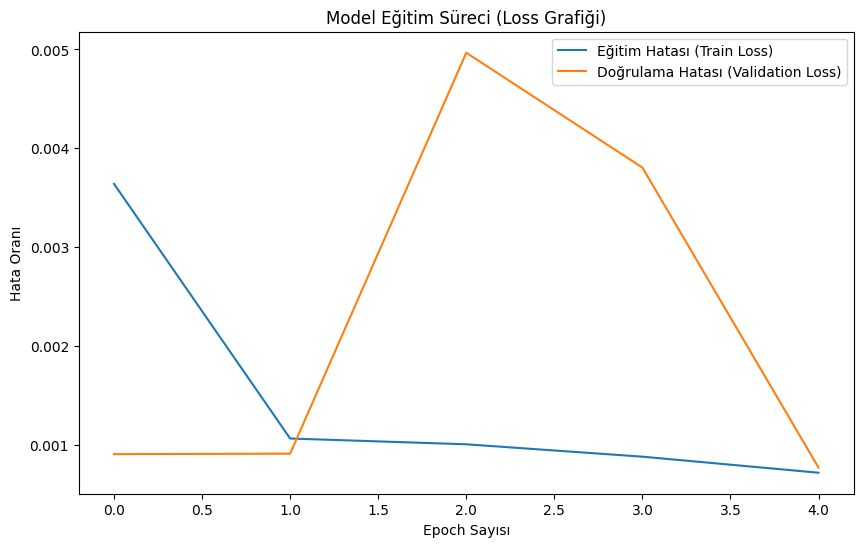

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Hatası (Train Loss)')
plt.plot(history.history['val_loss'], label='Doğrulama Hatası (Validation Loss)')
plt.title('Model Eğitim Süreci (Loss Grafiği)')
plt.xlabel('Epoch Sayısı')
plt.ylabel('Hata Oranı')
plt.legend()
plt.show()

**Geleceği Tahmin Etme (Test)**

Bu kod, veri setinin en son 60 gününü alacak, modele verecek ve "61. gün (yani yarın) fiyat ne olur?" sorusunu soracak

In [ ]:
# 1. Son 60 günün verisini alalım
last_60_days = scaled_data[-60:]

# 2. Modelin anlayacağı formata (3 Boyutlu) getirelim
x_test = []
x_test.append(last_60_days)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 3. TAHMİN YAP (Prediction)
tahmin_edilen_fiyat_scaled = model.predict(x_test)

# 4. Normalizasyonu Geri Al (0-1 arasındaki sayıyı Dolara çevir)
tahmin_edilen_fiyat = scaler.inverse_transform(tahmin_edilen_fiyat_scaled)

print(f"--------------------------------------------------")
print(f" Modelin {hisse_kodu} için Yarınki Fiyat Tahmini: {tahmin_edilen_fiyat[0][0]:.2f}$")
print(f"--------------------------------------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
--------------------------------------------------
 Modelin AAPL için Yarınki Fiyat Tahmini: 190.39$
--------------------------------------------------


**Modeli Kaydetme**

Arayüzü her açtığımızda modeli baştan 1 saat eğitmek istemeyiz, değil mi? Eğittiğimiz bu "beyni" dosya olarak kaydedeceğiz.

In [ ]:
# Modeli .h5 uzantılı dosya olarak kaydet
model.save("sentiment_borsa_model.h5")
print("✅ Model başarıyla 'sentiment_borsa_model.h5' olarak kaydedildi!")

✅ Model başarıyla 'sentiment_borsa_model.h5' olarak kaydedildi!


**Arayüz Kodları (Streamlit)**

In [ ]:
%%writefile app.py
import streamlit as st
import yfinance as yf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import datetime
import requests
from bs4 import BeautifulSoup
import tensorflow as tf
import random

# --- SABİTLEME (STABILITY) ---
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# --- SAYFA AYARLARI ---
st.set_page_config(page_title="Borsa Zekası", layout="wide", page_icon="📈")

# --- GÖRSELLİK DÜZELTME (CSS) ---
# Sorunun Çözümü Burada: Menüdeki yazı renklerini zorla SİYAH yapıyoruz.
st.markdown("""
<style>
    /* Sol Menü Başlıkları */
    [data-testid="stSidebar"] label {
        font-size: 15px !important;
        font-weight: bold !important;
        color: #333333 !important;
    }
    /* Dropdown ve Input Kutuları */
    .stSelectbox div[data-baseweb="select"] > div {
        background-color: white !important;
        color: black !important;
        border: 1px solid #dcdcdc !important;
    }
    .stTextInput input {
        background-color: white !important;
        color: black !important;
        border: 1px solid #dcdcdc !important;
    }
    /* Metrik Kutuları */
    .stMetric {
        background-color: #f8f9fa;
        padding: 10px;
        border-radius: 10px;
        border: 1px solid #e0e0e0;
        color: black !important;
    }
    /* Genel Yazı Rengi */
    body {
        color: black !important;
    }
</style>
""", unsafe_allow_html=True)

st.title("🧠 Yapay Zeka Destekli Borsa Analisti")
st.markdown("---")

# --- HABER ÇEKME FONKSİYONU ---
def get_guaranteed_news(symbol):
    news_list = []
    # Google Haberler RSS
    url = f"https://news.google.com/rss/search?q={symbol}+stock+news&hl=en-US&gl=US&ceid=US:en"
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.content, features="xml")
        items = soup.findAll('item')
        for item in items[:5]:
            title = item.title.text
            pub_date = item.pubDate.text if item.pubDate else ""
            news_list.append({'title': title, 'date': pub_date})
    except Exception as e:
        # Hata olursa sessizce geç, arayüzü bozma
        pass

    # Eğer Google boş dönerse Yahoo dene
    if not news_list:
        try:
            ticker = yf.Ticker(symbol)
            if ticker.news:
                for item in ticker.news[:3]:
                    title = item.get('title', '')
                    if title:
                        news_list.append({'title': title, 'date': ''})
        except:
            pass
    return news_list

# --- EĞİTİM FONKSİYONU ---
def train_model_live(df):
    data = df.filter(['Close'])
    dataset = data.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    x_train, y_train = [], []
    for i in range(60, len(scaled_data)):
        x_train.append(scaled_data[i-60:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=32, epochs=15, verbose=0)

    return model, scaler

# --- YAN MENÜ ---
st.sidebar.header("🔍 Hisse Seçimi")
st.sidebar.markdown("Analiz etmek istediğiniz hisseyi listeden seçin veya kodunu yazın.")

# Seçenekler
secim_listesi = ["AAPL (Apple)", "TSLA (Tesla)", "AMZN (Amazon)", "GOOGL (Google)", "MSFT (Microsoft)", "NVDA (Nvidia)", "THYAO.IS (THY)", "GARAN.IS (Garanti)"]

# Dropdown (Görünürlüğü düzeltildi)
secilen_hisse = st.sidebar.selectbox("📋 Hazır Listeden Seç:", secim_listesi)

# Manuel Giriş
st.sidebar.markdown("---")
manuel_giris = st.sidebar.text_input("✍️ Veya Kod Yaz (Örn: BTC-USD):")

# Mantık: Eğer manuel giriş varsa onu kullan, yoksa listeyi kullan
if manuel_giris:
    ticker_symbol = manuel_giris.upper().strip()
else:
    ticker_symbol = secilen_hisse.split()[0]

# Bilgilendirme Kutusu
st.sidebar.info(f"✅ Seçili Hisse: **{ticker_symbol}**")

# --- ANA İŞLEMLER ---

try:
    with st.spinner(f'{ticker_symbol} verileri indiriliyor ve analiz ediliyor...'):
        end_date = datetime.datetime.now()
        start_date = end_date - datetime.timedelta(days=365*2)

        df = yf.download(ticker_symbol, start=start_date, end=end_date)

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(0)

        if len(df) < 60:
            st.error(f"⚠️ {ticker_symbol} için yeterli veri bulunamadı. Lütfen kodu kontrol edin.")
            st.stop()

        son_fiyat = df['Close'].iloc[-1]

    # Ekran Düzeni
    c1, c2 = st.columns([1, 3])
    with c1:
        st.metric(label=f"{ticker_symbol} Son Fiyat", value=f"{son_fiyat:.2f}")

    with c2:
        st.subheader("📉 Fiyat Grafiği")
        fig, ax = plt.subplots(figsize=(10, 3))
        ax.plot(df.index, df['Close'], label='Kapanış Fiyatı', color='#1f77b4', linewidth=2)
        ax.set_title(f"{ticker_symbol} Son 2 Yıl Performansı")
        ax.legend()
        ax.grid(True, alpha=0.3)
        st.pyplot(fig)

    st.markdown("---")

    col_news, col_ai = st.columns(2)

    # --- HABERLER ---
    with col_news:
        st.subheader("📰 Duygu Analizi (Sentiment)")
        with st.spinner("Haberler taranıyor..."):
            news_data = get_guaranteed_news(ticker_symbol)
            analyzer = SentimentIntensityAnalyzer()

            if news_data:
                total_score = 0
                for news in news_data:
                    title = news['title']
                    score = analyzer.polarity_scores(title)['compound']
                    total_score += score

                    if score > 0.05: icon = "🟢"
                    elif score < -0.05: icon = "🔴"
                    else: icon = "⚪"

                    st.markdown(f"**{icon} {title}**")
                    st.caption(f"Skor: {score:.2f}")
                    st.markdown("---")

                avg_score = total_score / len(news_data)
                if avg_score > 0.05:
                    st.success(f"Piyasa Algısı: **POZİTİF (+{avg_score:.2f})**")
                elif avg_score < -0.05:
                    st.error(f"Piyasa Algısı: **NEGATİF ({avg_score:.2f})**")
                else:
                    st.info(f"Piyasa Algısı: **NÖTR ({avg_score:.2f})**")
            else:
                st.warning("Bu hisse için haber kaynağına ulaşılamadı.")

    # --- YAPAY ZEKA ---
    with col_ai:
        st.subheader("🤖 Yapay Zeka (LSTM) Tahmini")
        st.info("Model şu an canlı olarak eğitiliyor...")

        my_bar = st.progress(0)

        model, scaler = train_model_live(df)
        my_bar.progress(100)

        last_60_days = df['Close'].values[-60:].reshape(-1, 1)
        last_60_days_scaled = scaler.transform(last_60_days)
        X_test = np.array([last_60_days_scaled])

        pred_price = scaler.inverse_transform(model.predict(X_test))
        tahmin = pred_price[0][0]

        fark = tahmin - son_fiyat
        yuzde = (fark / son_fiyat) * 100

        st.metric("Yarınki Tahmin", f"{tahmin:.2f}")
        st.metric("Beklenen Değişim", f"{fark:.2f}", f"%{yuzde:.2f}")

        if fark > 0:
            st.success("Öneri: **AL / YÜKSELİŞ 🚀**")
        else:
            st.error("Öneri: **SAT / DÜŞÜŞ 🔻**")

except Exception as e:
    st.error(f"Beklenmeyen bir hata oluştu: {e}")

Overwriting app.py


**Arayüzü Başlatma**

Dosyamız (app.py) hazır. Şimdi Colab üzerinde bunu geçici bir web sitesi olarak yayınlayacağız.

34.26.125.198

In [ ]:
!pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com

34.26.125.198


In [ ]:
# Gerekli kütüphaneyi kur (Hata almamak için)
!pip install beautifulsoup4 lxml -q

# Uygulamayı başlat
!streamlit run app.py & npx -y localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧your url is: https://cool-buckets-fly.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.26.125.198:8501

2025-12-17 17:18:35.127624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765991915.154286   41751 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765991915.161790   41751 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765991915.181115   41751 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765991915.

**(IP sorarsa yine !curl ipv4.icanhazip.com koduyla öğrenip girersin.)**

In [ ]:
!curl ipv4.icanhazip.com

34.26.125.198
